# Proses Klasifikasi

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ProyekSainsData/tugas/prepo/cleaned-data-kelas.csv', index_col=0)
df.head()

,NIM,Nama,Judul,Abstrak,Kelas,judul_tokens,abstrak_tokens
0,40411100468,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,RPL,rancang implementasi sistem database distribus...,sistem informasi akademik siakad sistem inform...
1,40411100476,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,RPL,aplikasi kontrol monitoring jaring komputer ba...,jalan koneksi jaring komputer lancar ganggu ha...
2,70411100070,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Komputasi,sistem dukung putus optimasi jadwal matakuliah...,jadwal kuliah guru kompleks masalah variabel t...
3,80411100115,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Komputasi,sistem augmented reality animasi benda gerak f...,iring kembang teknologi dunia muncul teknologi...
4,70411100007,Adi Chandra Laksono,gerak pekerja pada game real time strategy men...,gerak pekerja ada pada game yang memiliki genr...,RPL,gerak kerja game real time strategy finite sta...,gerak kerja game milik genre rts real time str...


# Split Data

In [2]:
from sklearn.model_selection import train_test_split

X = df['abstrak_tokens']
y = df['Kelas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Extraction: TF-IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape

(554, 4881)

In [ ]:
# terms = vectorizer.get_feature_names()

# sums = X_train_tfidf.sum(axis=0)

# data = []
# for col, term in enumerate (terms):
#     data.append((term, sums[0,col]))
    
# ranking = pd.DataFrame(data, columns=['term', 'rank'])
# print(ranking.sort_values('rank', ascending=False))

# PCA

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X_train_tfidf.toarray())


# Oversampling: SMOTE

In [ ]:
y_train.value_counts()

Komputasi    301
RPL          178
NLP           75
Name: Kelas, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_tfidf, y_train)

y_train_resampled.value_counts()

Komputasi    301
RPL          301
NLP          301
Name: Kelas, dtype: int64

# Training Model


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# # defining parameter range
# param_grid = {'criterion':['gini','entropy', 'log_loss'],'max_depth':[10, 20, 30, None]}

# grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='roc_auc_ovr', cv=10, verbose=3)

# # fitting the model for grid search
# grid.fit(X_train_resampled, y_train_resampled)


In [9]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

model_gnb = gnb.fit(X_train, y_train)

prediction_gnb = model_gnb.predict(X_test)

ValueError: ignored

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Buat pengklasifikasi KNN
knn = KNeighborsClassifier(n_neighbors = 5)
# Sesuaikan pengklasifikasi dengan data
knn.fit(X_train,y_train)

ValueError: ignored

In [ ]:
# Tabel hasil GridSearchCV
results_df = pd.DataFrame(grid.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.085980,0.005714,0.004463,0.000388,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.764308,0.816311,0.833930,0.789815,0.843796,0.854352,0.924352,0.896574,0.867407,0.902963,0.849381,0.048185,2
1,0.107607,0.006027,0.004620,0.001227,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.760763,0.769057,0.735811,0.775000,0.840185,0.833333,0.908333,0.858333,0.850000,0.883333,0.821415,0.054741,6
2,0.108876,0.006197,0.004135,0.000227,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.752159,0.752256,0.752706,0.800000,0.825000,0.850000,0.883333,0.875000,0.850000,0.875000,0.821545,0.050973,5
3,0.112841,0.007782,0.004611,0.000862,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.752430,0.735681,0.760723,0.808333,0.816667,0.850000,0.900000,0.883333,0.866667,0.891667,0.826550,0.057907,4
4,0.166763,0.008371,0.006519,0.001147,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.751478,0.748865,0.876589,0.792593,0.843148,0.876852,0.918148,0.852778,0.903426,0.928611,0.849249,0.061956,3
5,0.194348,0.008681,0.007215,0.002184,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.752654,0.735407,0.801895,0.775000,0.775000,0.841667,0.908333,0.791667,0.866667,0.900000,0.814829,0.057840,7
6,0.156928,0.031288,0.006564,0.002508,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.736212,0.727390,0.826804,0.758333,0.775000,0.825000,0.891667,0.816667,0.850000,0.925000,0.813207,0.061731,8
7,0.134534,0.006581,0.005028,0.001308,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.727879,0.719011,0.802120,0.775000,0.766667,0.808333,0.883333,0.808333,0.858333,0.891667,0.804068,0.056767,11
8,0.152859,0.040375,0.006752,0.003319,log_loss,10,"{'criterion': 'log_loss', 'max_depth': 10}",0.763395,0.750806,0.887731,0.792778,0.844074,0.876852,0.927222,0.839167,0.885833,0.929630,0.849749,0.060414,1
9,0.304488,0.077464,0.012477,0.008300,log_loss,20,"{'criterion': 'log_loss', 'max_depth': 20}",0.727654,0.727299,0.793653,0.791667,0.758333,0.825000,0.866667,0.800000,0.858333,0.891667,0.804027,0.053924,12


In [ ]:
# Peringkat Score Parameter hasil GridSearchCV
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("criterion")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
criterion,,,,
log_loss_10,"{'criterion': 'log_loss', 'max_depth': 10}",1,0.849749,0.060414
gini_10,"{'criterion': 'gini', 'max_depth': 10}",2,0.849381,0.048185
entropy_10,"{'criterion': 'entropy', 'max_depth': 10}",3,0.849249,0.061956
gini_None,"{'criterion': 'gini', 'max_depth': None}",4,0.826550,0.057907
gini_30,"{'criterion': 'gini', 'max_depth': 30}",5,0.821545,0.050973
gini_20,"{'criterion': 'gini', 'max_depth': 20}",6,0.821415,0.054741
entropy_20,"{'criterion': 'entropy', 'max_depth': 20}",7,0.814829,0.057840
entropy_30,"{'criterion': 'entropy', 'max_depth': 30}",8,0.813207,0.061731
log_loss_30,"{'criterion': 'log_loss', 'max_depth': 30}",9,0.806559,0.063659


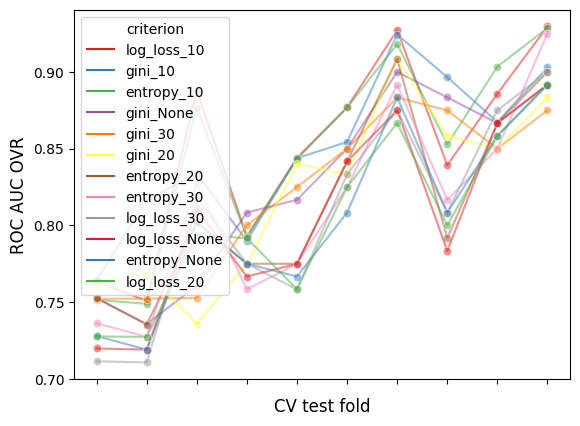

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose(),
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("ROC AUC OVR", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

In [ ]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)
model = clf.fit(X_train_resampled,y_train_resampled)

Correlation of models:
 criterion      log_loss_10   gini_10  entropy_10  gini_None   gini_30  \
criterion                                                               
log_loss_10       1.000000  0.818640    0.989010   0.753463  0.705629   
gini_10           0.818640  1.000000    0.848210   0.859542  0.862974   
entropy_10        0.989010  0.848210    1.000000   0.805829  0.762235   
gini_None         0.753463  0.859542    0.805829   1.000000  0.988998   
gini_30           0.705629  0.862974    0.762235   0.988998  1.000000   
gini_20           0.675757  0.872925    0.715641   0.930223  0.953318   
entropy_20        0.919245  0.798676    0.917156   0.824149  0.771939   
entropy_30        0.955068  0.854518    0.953439   0.810670  0.756182   
log_loss_30       0.940427  0.809049    0.961380   0.830543  0.769363   
log_loss_None     0.956263  0.792784    0.965815   0.806430  0.755896   
entropy_None      0.931797  0.844587    0.946680   0.865446  0.804711   
log_loss_20       0.895716 

[Text(0.5754032258064516, 0.9545454545454546, 'x[107] <= 0.0\ngini = 0.667\nsamples = 903\nvalue = [301, 301, 301]'),
 Text(0.4342741935483871, 0.8636363636363636, 'x[3409] <= 0.0\ngini = 0.606\nsamples = 499\nvalue = [144, 93, 262]'),
 Text(0.3556451612903226, 0.7727272727272727, 'x[390] <= 0.003\ngini = 0.569\nsamples = 463\nvalue = [142, 59, 262]'),
 Text(0.23709677419354838, 0.6818181818181818, 'x[2709] <= 0.011\ngini = 0.612\nsamples = 299\nvalue = [132, 43, 124]'),
 Text(0.15161290322580645, 0.5909090909090909, 'x[126] <= 0.018\ngini = 0.537\nsamples = 118\nvalue = [24, 20, 74]'),
 Text(0.12258064516129032, 0.5, 'x[167] <= 0.024\ngini = 0.438\nsamples = 101\nvalue = [16, 12, 73]'),
 Text(0.10967741935483871, 0.4090909090909091, 'x[1882] <= 0.025\ngini = 0.389\nsamples = 96\nvalue = [16, 7, 73]'),
 Text(0.0967741935483871, 0.3181818181818182, 'x[2827] <= 0.0\ngini = 0.348\nsamples = 92\nvalue = [12, 7, 73]'),
 Text(0.05161290322580645, 0.22727272727272727, 'x[3874] <= 0.029\ngini 

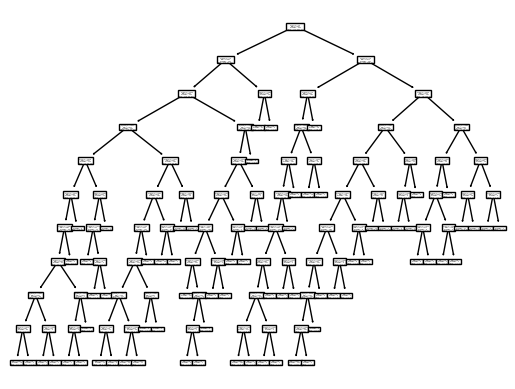

In [ ]:
from sklearn import tree

tree.plot_tree(model) 

In [ ]:
print('Decision Tree depth : ',model.get_depth())
print('Decision Tree n leaves : ',model.get_n_leaves())

Decision Tree depth :  10
Decision Tree n leaves :  71


# Evaluation

In [ ]:
predictions = model.predict(X_test_tfidf)

In [ ]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[79 10 24]
 [26 14  9]
 [18  5 53]]


In [ ]:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(clf, X_test_tfidf, y_test) 
# plt.show()

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

   Komputasi       0.64      0.70      0.67       113
         NLP       0.48      0.29      0.36        49
         RPL       0.62      0.70      0.65        76

    accuracy                           0.61       238
   macro avg       0.58      0.56      0.56       238
weighted avg       0.60      0.61      0.60       238



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions))
print('Precision score : ', precision_score(y_test, predictions, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions, average='weighted'))

Accuracy score :  0.6134453781512605
Precision score :  0.601132846590237
Recall score :  0.6134453781512605
F1 score :  0.6007171471611484


# Export Model

In [ ]:
# from joblib import dump

# dump(model, filename="model/dtc-model-abstrak.joblib")
# dump(vectorizer, filename="model/vectorizer_model_abstrak.joblib")

# Demo

In [ ]:
title_input = input("Masukkan Abstrak Skripsi:\n")

'''
catatan input:
sisinta um adalah sistem informasi berbasis website bertujuan untuk menampilkan data yang berkaitan dengan skripsi dan tugas akhir pada jurusan teknik elektro fakultas teknik universitas negeri malang. penggunaan sistem informasi sisinta memiliki potensi jika dikembangkan dengan mengklasifikasikan judul dan abstrak berdasarkan tema penelitiannya. tujuan penelitian ini adalah untuk menerapkan dan menguji performa algoritma decision tree classifier dalam mengklasifikasi judul skripsi dan tugas akhir, berdasarkan tema penelitian dalam kbk di jurusan teknik elektro ft um. decision tree classifier adalah algoritma supervised learning non-parametrik, yang digunakan untuk klasifikasi dan regresi. decision tree memiliki hierarki, struktur pohon, yang terdiri dari root node, branches, internal nodes dan leaf nodes. dengan menggunakan metode decision tree classifier dalam implementasinya diharapkan dapat memprediksi jenis kelompok bidang keahlian yang sesuai. data yang digunakan dalam penelitian sistem klasifikasi ini didapatkan dari database sisinta te-um berupa judul, abstrak, dan kbk yang terkait dengan tema penelitian pada skripsi dan tugas akhir tersebut.
'''

hasil = clf.predict_proba(vectorizer.transform([title_input]))

print(f"Abstrak Skripsi: {title_input}")

list1 = hasil.tolist()
cls = clf.classes_
list2 = cls.tolist()

d = {"Kelompok Bidang Keahlian":list2,"Probability":list1[0]}
df_proba = pd.DataFrame(d)

print(df_proba.sort_values("Probability", ascending=False))

Masukkan Abstrak Skripsi:
Setiap perusahaan mengharapkan adanya hubungan baik dengan pelanggan, begitupun dengan PT. X sebagai perusahaan yang bergerak di bidang minyak dan gas bumi Negara. Pengelolaan hubungan yang baik akan berdampak pada peningkatan citra perusahaan dimata pelanggan. Penilaian kinerja perusahaan dapat diukur dengan menggunakan kriteria dari CRM Scorecard. CRM Scorecard diambil dari Balanced Scorecard (BSC) dengan berfokus pada pelanggan. Adanya penilaian kinerja dengan metode Analytic Network Process (ANP) untuk pembobotan, PT. X dapat  menilai kinerja perusahaan dengan ditunjukkan oleh Traffic Light System sebagai hasilnya. Hasil scoring KPI menunjukkan bahwa terdapat 2 KPI yang berada pada level buruk, yaitu Ekuitas Pelanggan dan Sistem Penghargaan. Kedua KPI ini diperlukan perhatian yang lebih. Indikator yang berada pada level cukup ada 3 KPI, yaitu yaitu Perluasan Pelanggan, Teknologi Informasi, dan Struktur Organisasi. Perusahaan harus berhati-hati dengan berba